# Classical Statistical Inference: Working with PDF and CDF

## Table of Content:

See [Basic-statistics_01.ipynb](Basic-statistics_01.ipynb) for a recap of the basic probability concepts. 
- I.6 [Working with pdf and CDF](#I.6-Working-with-pdf-and-CDF)
    * I.6.1 [Create and fit specific distributions](#I.6.1-Create-and-fit-specific-distributions:)
    * I.6.2 [Generate random samples / Monte Carlo methods:](#I.6.2-Generate-random-samples-/-Monte-Carlo-methods:)
    * I.6.3 [Monte Carlo methods and error estimates](#I.6.3-Monte-Carlo-methods-and-error-estimates)
    * I.6.4 [Clone an arbitrary distribution with Monte-Carlo method](#I.6.4-Clone-arbitrary-distribution-using-Monte-Carlo-method:)

- X. [References and supplementary material](#X)

In [2]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

### I.6 Working with pdf and CDF 

In scipy.stats, there are classes for many distributions, which have methods that can very useful to study pdf! 

#### I.6.1 Create and fit specific distributions:

For example, to produce an instance of a normal distribution with "frozen" parameters (mean=2, standard deviation=2 here), you can just do:

In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = scipy.stats.norm(2, 4)

You can now use this distribution in various ways. For example, to plot the pdf and cdf, you can do this:

Text(0.5,1,u'CDF')

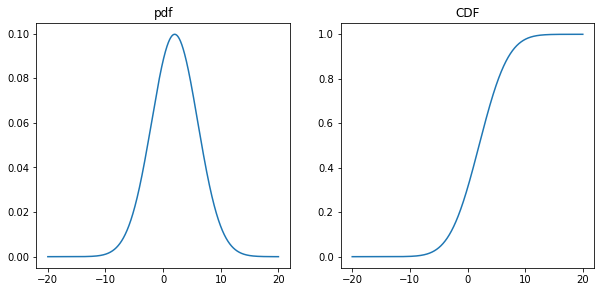

In [2]:
## define some x coordinates
x = np.linspace(-20, 20, 2000)

## make a figure
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,4.5))
ax.plot(x, n.pdf(x))
ax.set_title("pdf")

ax2.plot(x, n.cdf(x))
ax2.set_title("CDF")

# Note, this example is adapted from Daniela Huppenkothen and Fernando Perez 
# https://github.com/dhuppenkothen/ClassicalStatsPython

It is also possible with `scipy.stats` to  fit a distribution to a data sample:

The fit parameter for the mean of the distribution is: 2.1346
The fit parameter for the standard deviation of the distribution is: 4.0732


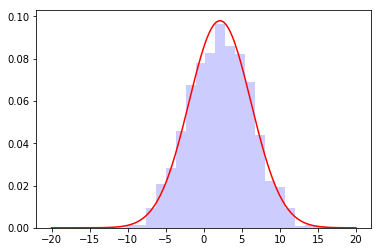

In [3]:
## now fit a normal distribution to the sample with the 
## fit method of the norm class
sample = np.random.normal( 2, 4, 1000)
fitpdf_mean, fitpdf_sigma = scipy.stats.norm.fit(sample)
plt.hist(sample, bins=20, color='blue', alpha=0.2, normed=True)
x = np.linspace(-20, 20, 200)
plt.plot(x, scipy.stats.norm.pdf(x, fitpdf_mean, fitpdf_sigma), color='red')

print("The fit parameter for the mean of the distribution is: %.4f"%fitpdf_mean)
print("The fit parameter for the standard deviation of the distribution is: %.4f"%fitpdf_sigma)

Note that fit will NOT work for discrete distributions ! 

You can also calculate the $p$ percentile of a function or "percent point function" or ppf (i.e. the inverse of the cdf): `scipy.stats.distrib.ppf(q)` 

In [4]:
n = scipy.stats.norm(0, 1)
print 'q_25 and q_75 are %.3f , %.3f' %(n.ppf(0.25), n.ppf(0.75))
print 'The interquartile range is %.3f' % (n.ppf(0.75)- n.ppf(0.25))

q_25 and q_75 are -0.674 , 0.674
The interquartile range is 1.349


You can also calculate various statistics associated to your function such as the mean, median, standard deviation, central moments, ...

In [5]:
print 'Mean = %.2f  ' %n.mean()
print 'Median = %.2f  ' %n.median()
print 'Stdev = %.2f  ' %n.std()
print 'Central moment of order 4 = %.2f' %n.moment(4)

Mean = 0.00  
Median = 0.00  
Stdev = 1.00  
Central moment of order 4 = 3.00


#### I.6.2 Generate random samples / Monte-Carlo methods: 

The distributions in `scipy.stats.distributions` each have a method called `rvs` which implements a pseudo random sample from the distribution. This is extremely useful if you want to generate "mock data" that follow a specific distribution. We have already done it when we had to add gaussian noise to generate fake data. 

Here is an example generating a mock sample drawn from a uniform distribution:

$$
p(x \, | \, \mu, W) = \frac{1}{W} ~ \mathrm{for}~|x-\mu| \leq \frac{W}{2}, ~\mathrm{and~0~otherwise}
$$

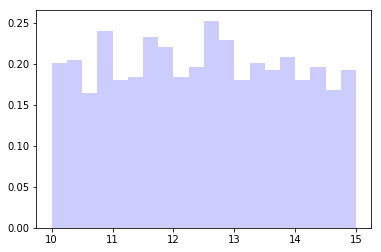

In [6]:
uni = scipy.stats.uniform(10, 5)   # First argument, i.e. 10, is the left edge, second is width
uni_sample = uni.rvs(1000)
qq = plt.hist(uni_sample, bins=20, color='blue', alpha=0.2, normed=True)

**Question:** Do you understand the values on $y$ scale ? 

#### I.6.3 Monte-Carlo methods and error estimates

##### I.6.3.1 Variable transformation

As you may know, any function of a random variable is a random variable. And in practice, we rarely measure directly measure the "primal" random variable $x$ but rather a function $y = \phi(x)$ of the latter.    

If we know the pdf $p(x)$ (where $x$ is a random variable), then [remember](Descriptive_statistics.ipynb) that the probability distribution $p(y)$, where $y = \phi(x)$ (and so $x = \phi^{-1}(y)$), is:

$$
p(y) = P'(y) = p\left[ \phi^{-1} \left(y \right) \right] \left| \frac{{\rm d}\,\phi^{-1}(y) }{{\rm{d}} y} \right|
$$

where $P'(y)$ is the first derivative of the CDF.  

Let's consider the case where $x$ is drawn from a uniform distribution, but we study $y = -2.5*log(x)$. Then we have $x = \phi^{-1}(y) = 10^{-0.4*y} $. Since we have a uniform distribution for $x$, we have $p(x) = 1$ if $0 \leq x \leq 1$, and therefore $p(y) =  0.4\, \ln(10) \, 10^{-0.4\,y}$ with $0 \,< \,y \,<\,\infty $. 

Note that we take the absolute value of the first derivative. 

/home/dominis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


Text(0,0.5,u'$p_y(y)$')

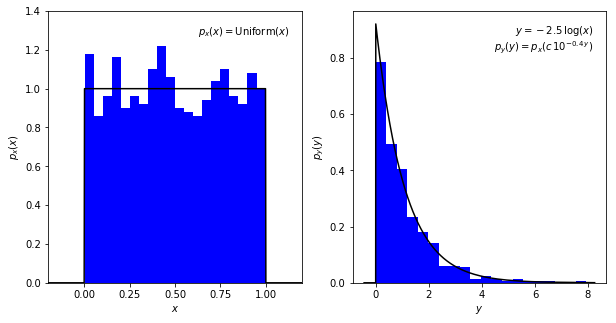

In [7]:
# create a uniform distribution
uniform_dist = scipy.stats.uniform(0.0001, 1)
x_sample = uniform_dist.rvs(1000)
# Calculate the pdf of x to overplot it
x = np.linspace(-0.5, 1.5, 1000)
Px = uniform_dist.pdf(x)

# transform the data
y_sample = -2.5*np.log10(x_sample)
# Calculate the pdf of y to overplot it
y = -2.5*np.log10(x)
Py = 0.4 * np.log(10) * Px * 10**(-0.4*y)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.hist(x_sample, 20, histtype='stepfilled', fc='blue', normed=True)
ax.plot(x, Px, '-k')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 1.4001)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, r'$p_x(x) = {\rm Uniform}(x)$', va='top', ha='right', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p_x(x)$')


ax = fig.add_subplot(122)
ax.hist(y_sample, 20, histtype='stepfilled', fc='blue', normed=True)
ax.plot(y, Py, '-k')
#ax.set_xlim(0.85, 2.9)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, '$y=-2.5\,\log(x)$\n$p_y(y)=p_x(c\,10^{-0.4\,y})$', va='top', ha='right', transform=ax.transAxes)
ax.set_xlabel('$y$')
ax.set_ylabel('$p_y(y)$')


**Exercise:** 

Calculate and visualise the CDF of the two (sampled) distributions above and estimate (visually) from the CDF the median of the distribution (Tip: `sample.sort()` to sort your sample, and then `rank` entries to estimate the CDF). What can you say ?

##### I.6.3.2 Error estimate and Error propagation formula:

If we have a function $z = \phi(x,y)$, where $x $ and $y$ are random variable with sample values $x_i = {x_1, ..., x_n}$ and $y_i = {y_1, ..., y_n}$, then the error on $\sigma_z$ is given by the well known **Error propagation formula**:  

$$
\sigma_z^2 \, = \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \sigma_x^2 \, + \left( \frac{\partial \phi}{\partial y} \right)_\bar{y}^2  \sigma_y^2  + 2  \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} \sigma_{xy}
$$

*Demonstration:*
We can define $z_i$ as $\phi(x_i, y_i)$ (i.e. $\phi$ evaluated at $(x_i, y_i)$), and $\bar{z}$ as $\phi(\bar{x}, \bar{y})$ (i.e. $\phi$ evaluated at its mean value). 

The Taylor expansion of $z$ around its average value is:

$$
z_i = \phi(\bar{x}, \bar{y}) \, + \,  \left(\frac{\partial \phi}{\partial x} \right)_\bar{x}  \, (x_i-\bar{x})+ \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y} \, (y_i-\bar{y})  ~ + ~{\rm {higher~order~terms}}
$$

If the measured values $x_i, y_i$ are close to the average, then, neglecting the higher order terms, we have:   

$$
z_i - \bar{z} = \left(\frac{\partial \phi}{\partial x} \right)_\bar{x}  \, (x_i-\bar{x})+ \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y} \, (y_i-\bar{y})
$$

We can then calculate the variance on $\Phi$ which is:    

$$
\sigma_z^2 \, = \, \sum_i^{N} \, \frac{(z_i - \bar{z})^2}{N} 
$$

Hence,    
$$
\sigma_z^2 \, = \, \frac{1}{N} \sum_i^{N} \, (x_i-\bar{x})^2 \, \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \,   +  \frac{1}{N} \sum_i^{N} \, (y_i-\bar{y})^2 \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y}^2 \,  + \frac{2}{N}  \sum_i^{N}   \, (x_i-\bar{x}) (y_i-\bar{y}) \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} 
$$

$$
\sigma_z^2 \, = \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \sigma_x^2 \, + \left( \frac{\partial \phi}{\partial y} \right)_\bar{y}^2  \sigma_y^2  + 2  \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} \sigma_{xy}
$$

Such error estimates for non-linear functions (i.e. non linear in their variables) are biased on account of using a truncated series expansion. 

Note also that even in the simpler case where $z = \phi(x)$ (simple transformation of variable), there is no guarantee, if $x$ follows a gaussian distribution of width $\sigma_x$, that the transformed variable $z$ also follows a gaussian distribution of width $\sigma_z$. 

**Conclusions:** Although there is no explicit assumption regarding the pdf in the derivation of the "error propagation" formula, there is an implicit one which comes from neglecting higher order terms. We'll see hereafter how Monte-Carlo simulations can be used to study the distribution of a transformed variable. 

##### I.6.3.3 Monte-Carlo Error estimate:

By using Monte-Carlo simulations, we can verify the validity of the error propagation formula, but also have a way to derive the mean value and variance. Indeed, random samples allow us to approximate a pdf by drawing a virtually infinite samples from it. This means that:

$$
E(f(x)) \, = \, \int\limits_{-\infty}^{+\infty} f(x) h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N f(x_i),
$$

where $x_i$ is a random number drawn from the distribution $h(x)$, which, for the purpose of Monte-carlo simulations, is a uniform distribution ($h(x) = 1/(b-a)$).   
If we specialize that formula for the mean, we have:

$$
\mu = \int_{-\infty}^{+\infty} x \,h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N x_i,
$$

and the variance

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x - \mu)^2 \, h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N (x_i - \hat{\mu})^2
$$

It's basically as if we did our experiment nearly infinitely many times.


- Let's first apply the Monte-carlo approach to the simple case of the sum of two random variables ($a$ and $b$) drawn from a gaussian distribution, and compare the result to the Gaussian distribution we derive from std error propagation formula:

** z = a + b **

*Standard error propagation:*

$\sigma_z^2 = \left(\frac{\partial z}{\partial a}\right)^2 \sigma_a^2 + \left(\frac{\partial z}{\partial b}\right)^2 \sigma_b^2$

$\Longrightarrow \sigma_z^2 =  \sigma_a^2 + \sigma_b^2$


Error from error propagation: z = 8.00 +- 1.41
MC Error: z = 8.01 +- 1.41


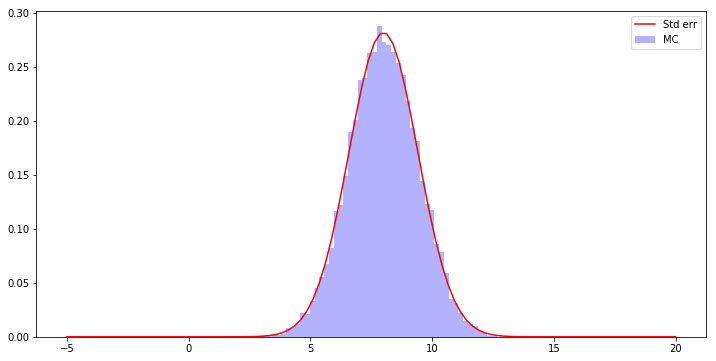

In [8]:
mu_a, sigma_a = 5., 1.
mu_b, sigma_b = 3., 1.

a = scipy.stats.norm(mu_a, sigma_a)
b = scipy.stats.norm(mu_b, sigma_b)
sample_a = a.rvs(10000)
sample_b = b.rvs(10000)
sample_z = sample_a + sample_b

mu_z, sigma_z = (mu_a + mu_b), np.sqrt(sigma_a**2 + sigma_b**2)  # error propagation formula
z = scipy.stats.norm(mu_z, sigma_z)

plt.figure(figsize=(12, 6))
z_hist = plt.hist(sample_z, bins=50, normed=True, color='blue', alpha=0.3, label='MC')
x = np.linspace(-5, 20, 100)
plt.plot(x, z.pdf(x), color='red', label='Std err')
plt.legend()

sample_mu_z = np.mean(sample_z)
sample_sig_z = np.std(sample_z)

print "Error from error propagation: z = %1.2f +- %1.2f" % (mu_z, sigma_z)
print "MC Error: z = %1.2f +- %1.2f" % (sample_mu_z, sample_sig_z)

** Exercise **

Generate e.g. N = 10000 samples of random variables of e.g. n=30 points, to verify that the error you do by estimating the mean of a Gaussian distribution is $stde \, = \, \sigma_\bar{x} = \, s / \sqrt{n}$, where $n$ is the number of points used to estimate the mean $\bar{x}$. 
For simplicity work with a normal distribution N(0,1).

Bonus:    
What is the distribution of the sample variance ($\sigma^2_{\bar x}$) and what is the error you do on the variance ? 

Remember: 
If the sample contains $n$ random variables:    
=> The **sample mean** is effectively distributed as a **normal distribution $N(\mu, \sigma/\sqrt{n})$**    
=> If $s^2 = \hat{\sigma}^2$ is the **sample variance**, then $(n-1)*s^2 / \sigma^2$ effectively distributed as a **chi2 distribution with $(n-1)$ degrees of freedom**.    
For a $N(\mu, \sigma)$ distribution, the error on the estimator of the variance is $\hat{\sigma}^2 \sqrt{2\,/(n-1)}$.      
The error on the sample **standard deviation** is $\hat{\sigma} / \sqrt{2(n-1)}$    

(See e.g.  http://hamelg.blogspot.be/2015/11/python-for-data-analysis-part-16.html for a formal demonstration)

* Let's now try with the product of two random variables:  **z = a * b **

Standard Error Propagation:

$\sigma_z^2 = b^2\sigma_a^2 + a^2\sigma_b^2 = z^2\left(\left(\frac{\sigma_a}{a}\right)^2 + \left(\frac{\sigma_b}{b}\right)^2\right)$


Error from error propagation: z = 1.00 +- 1.00
MC Error: z = 1.01 +- 1.02


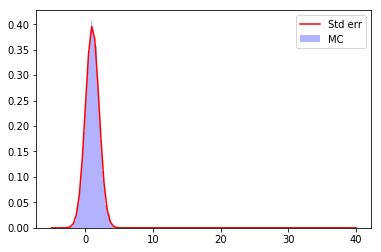

In [14]:
mu_a, sigma_a = 1., .1
mu_b, sigma_b = 1., 1.

a = scipy.stats.norm(mu_a, sigma_a)
b = scipy.stats.norm(mu_b, sigma_b)
sample_a = a.rvs(10000)
sample_b = b.rvs(10000)
sample_z = sample_a * sample_b

mu_z = (mu_a * mu_b) 
sigma_z = mu_z * np.sqrt((sigma_a / mu_a)**2  + (sigma_b / mu_b)**2)  # error propagation formula
z = scipy.stats.norm(mu_z, sigma_z)

z_hist = plt.hist(sample_z, bins=50, normed=True, color='blue', alpha=0.3, label='MC')
x = np.linspace(-5, 40, 100)
plt.plot(x, z.pdf(x), color='red', label='Std err')
plt.legend()

sample_mu_z = np.mean(sample_z)
sample_sig_z = np.std(sample_z)

print "Error from error propagation: z = %1.2f +- %1.2f" % (mu_z, sigma_z)
print "MC Error: z = %1.2f +- %1.2f" % (sample_mu_z, sample_sig_z)

Modify the error on b in the above example, and see how the final distribution behaves. 

** Exercise: **

Examine the error on the magnitude: $z = -2.5 * log(a) $ using monte-carlo method and compare it to the results one would obtain using the error propagation formula. Consider a normalised flux $a = 1$ and a relative error $\sigma_a = 0.2$.

Note that the `scipy.stats.distribution.rvs()` (replacing "distribution" by the name of the distribution of interest) is complemented by `np.random()` that allows one to draw samples from a gaussian distribution or in uniform interval.    

#### I.6.4 Clone arbitrary distribution using Monte-Carlo method:
    
In the case of one dimensional distribution, it is pretty easy to generate a mock sample from an arbitrary distribution. This method, also called *transformation method*, makes use of the fact that to a given pdf f(x) is associated a CDF $F(x)$. The CDF, $F(x)$ provides, for each value of $x_i$, the probability that $p(x < x_i)$, and we have $0 < p(x < x_i) < 1$. One can read the CDF the other way around (i.e. take the inverse of the CDF) to generate a random sample from a specific distribution (this is in fact the method used by `scipy.stats.distribution.rvs()` to generate a data sample following a given distribution). For this purpose, one generates a uniform sample of $y$, with $0 < y < 1$, and reads on the corresponding values $x'$. 

The following figure illustrates the concept of cloning an arbitrary 1-D distribution. It implies first to construct the CDF from the observed data and then possibly build a look-up table or model the cdf analytically. 


/home/dominis/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:127: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._random_state.standard_normal(self._size)


Text(0,0.5,u'$p(x)dx$')

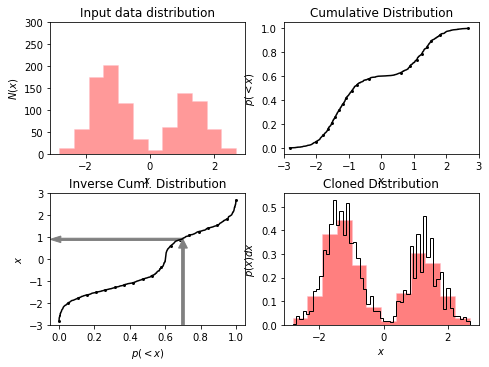

In [10]:
from astroML.plotting import hist  

# Figure 3.25 from our reference book illustrating 
# the "transformation method" to clone an arbitrary distribution. 

#------------------------------------------------------------
# Create a distribution and clone it
Ndata = 1000
Nclone = 100000
np.random.seed(0)

# generate an 'observed' bimodal distribution with 10000 values
# You might not understand the details here ... this is a bit more advances python
dists = (scipy.stats.norm(-1.3, 0.5), scipy.stats.norm(1.3, 0.5))
fracs = (0.6, 0.4)
x = np.hstack((d.rvs(f * Ndata) for d, f in zip(dists, fracs)))

# create a cumulative distribution
x.sort()
Px_cuml = np.linspace(0, 1, Ndata)

# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.splrep(Px_cuml, x)

# sample evenly along the cumulative distribution, and interpolate
Px_cuml_sample = np.linspace(0, 1, 10 * Ndata)
x_sample = scipy.interpolate.splev(Px_cuml_sample, tck)

# derive the cloned distribution
y_cloned = np.random.sample(Nclone)   
x_cloned = scipy.interpolate.splev(y_cloned, tck)

#------------------------------------------------------------
# Plot the cloned distribution and the procedure for obtaining it
fig = plt.figure(figsize=(7, 5))
fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,
                    bottom=0.08, top=0.92)

indices = np.linspace(0, Ndata - 1, 20).astype(int)

# plot a histogram of the input
ax = fig.add_subplot(221)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', ec='pink', fc='red', alpha=0.4)
ax.set_ylim(0, 300)
ax.set_title('Input data distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$N(x)$')

# plot the cumulative distribution
ax = fig.add_subplot(222)
ax.scatter(x[indices], Px_cuml[indices], lw=0, c='k', s=9)
ax.plot(x, Px_cuml, '-k')
ax.set_xlim(-3, 3)
ax.set_ylim(-0.05, 1.05)
ax.set_title('Cumulative Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(<x)$')

# plot the inverse cumulative distribution and spline fit
ax = fig.add_subplot(223)
ax.scatter(Px_cuml[indices], x[indices], lw=0, c='k', s=9)
ax.plot(Px_cuml_sample, x_sample, '-k')
ax.arrow(0.7, -3, 0, 3.5, width=0.015, fc='gray', ec='gray',
         head_width=0.05, head_length=0.4)
ax.arrow(0.7, 0.9, -0.69, 0, width=0.1, fc='gray', ec='gray',
         head_width=0.3, head_length=0.06)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-3, 3)
ax.set_title('Inverse Cuml. Distribution')
ax.set_xlabel('$p(<x)$')
ax.set_ylabel('$x$')

# plot the resulting cloned distribution
ax = fig.add_subplot(224)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', normed=True,
     ec='pink', fc='red',
     label='input data', alpha=0.5)
hist(x_cloned, bins='knuth', ax=ax,
     histtype='step', normed=True,
     color='k', label='cloned data')
ax.set_title('Cloned Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)dx$')
#ax.text(0.75, 0.95, "KS test:\nD = %.2f\np = %.2f" % (D, p),
#        ha='left', va='top', transform=ax.transAxes)


In case of multi-variate distribution, things can be more complicated, unless the distribution can be separated into a product of independant 1-D distributions. We refer to our reference [book](#book) (sect. 3.7, 6.3.2) for discussion about the strategies to adopt in such situations. 

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3 ** (3.1, 3.2) and **Chapter 4 ** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).  

* Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2 **

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

